# Data Scraping
**We will be extracting customer data ratings from the British airline website: https://www.airlinequality.com/airline-reviews/british-airways. The data we aim to scrape includes airline ratings, seat ratings, and lounge experience ratings from the website.

In [193]:
#imports libs

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests


In [194]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [198]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html5")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.find("span").next_sibling.strip(" ()"))

Error on page 32
Error on page 33
Error on page 33


In [199]:
#check the length of total reviews extracted
len(reviews)

3500

In [200]:
len(country)

3500

In [201]:
#check the length 
stars = stars[:3500]

In [202]:
#create  a dataframe from these collected lists of data

df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [203]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | The flight took off a littl...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,9th December 2023,United Kingdom
1,✅ Trip Verified | BA is great in the air! But....,10,6th December 2023,Ecuador
2,✅ Trip Verified | I had broken my leg 2 days ...,1,5th December 2023,United States
3,✅ Trip Verified | Check in at MIA straightforw...,1,4th December 2023,United Kingdom
4,✅ Trip Verified | Never I saw such a terribl...,7,3rd December 2023,United Kingdom


In [204]:
df.shape

(3500, 4)

# Data Cleaning

In [205]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#regex
import re

In [206]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | The flight took off a littl...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,9th December 2023,United Kingdom
1,✅ Trip Verified | BA is great in the air! But....,10,6th December 2023,Ecuador
2,✅ Trip Verified | I had broken my leg 2 days ...,1,5th December 2023,United States
3,✅ Trip Verified | Check in at MIA straightforw...,1,4th December 2023,United Kingdom
4,✅ Trip Verified | Never I saw such a terribl...,7,3rd December 2023,United Kingdom


In [207]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [208]:
df['verified']

0        True
1        True
2        True
3        True
4        True
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

In [209]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'reviews' column

# Strip unwanted text from reviews
df['clean_reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '', regex=False)

# Lemmatization and stopwords removal without using NLTK
def lemmatize_and_remove_stopwords(text):
    # Define a simple lemmatizer function
    def lemmatize(word):
        # You can customize this function based on your specific needs
        return word.lower()  # For simplicity, converting to lowercase
    
    # Define a set of common English stopwords
    stopwords_set = set(["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "couldn", "didn", "doesn", "hadn", "hasn", "haven", "isn", "ma", "mightn", "mustn", "needn", "shan", "shouldn", "wasn", "weren", "won", "wouldn"])
    
    # Remove non-alphabetic characters
    text = ''.join(char if char.isalpha() or char.isspace() else ' ' for char in text)
    
    # Tokenize, lemmatize, and remove stopwords
    tokens = [lemmatize(word) for word in text.lower().split() if word.lower() not in stopwords_set]
    
    # Join the tokens back into a string
    return ' '.join(tokens)

# Apply the lemmatization and stopwords removal function to each review
df['clean_reviews'] = df['clean_reviews'].apply(lemmatize_and_remove_stopwords)

# The 'clean_reviews' column now contains the cleaned and processed text
corpus = df['clean_reviews'].tolist()

In [210]:
df.head()

,reviews,stars,date,country,verified,clean_reviews
0,✅ Trip Verified | The flight took off a littl...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,9th December 2023,United Kingdom,True,flight took little late due heathrow congestio...
1,✅ Trip Verified | BA is great in the air! But....,10,6th December 2023,Ecuador,True,ba great air sell connections thru london heat...
2,✅ Trip Verified | I had broken my leg 2 days ...,1,5th December 2023,United States,True,broken leg days return flight lisbon london ca...
3,✅ Trip Verified | Check in at MIA straightforw...,1,4th December 2023,United Kingdom,True,check mia straightforward ba use american flag...
4,✅ Trip Verified | Never I saw such a terribl...,7,3rd December 2023,United Kingdom,True,never saw terrible customer experience plane l...


# Cleaning/Fromat date

In [215]:
df.dtypes

reviews          object
stars            object
date             object
country          object
verified           bool
clean_reviews    object
dtype: object

In [37]:
# convert the date to datetime format

df.date = pd.to_datetime(df.date)

In [213]:
df.date.head()

0    9th December 2023
1    6th December 2023
2    5th December 2023
3    4th December 2023
4    3rd December 2023
Name: date, dtype: object

# Cleaning ratings with stars

In [39]:
#check for unique values
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '1', '7', '5', '9', '3', '8', '2',
       '6', '4', '10', 'None'], dtype=object)

In [40]:
# remove the \t and \n from the ratings
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [41]:
df.stars.value_counts()

1       848
2       406
3       390
8       341
10      290
9       283
7       282
5       251
4       235
6       171
None      3
Name: stars, dtype: int64

# There are 3 rows having values "None" in the ratings. We will drop all these 3 rows. 

In [42]:
# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [43]:
#check the unique values again
df.stars.unique()

array(['5', '1', '7', '9', '3', '8', '2', '6', '4', '10'], dtype=object)

In [44]:
df.isnull().value_counts()

reviews  stars  date   country  verified  clean_reviews
False    False  False  False    False     False            3497
dtype: int64

In [45]:
df.country.isnull().value_counts()

False    3497
Name: country, dtype: int64

In [46]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [47]:
df.shape

(3497, 6)

In [48]:
#resetting the index
df.reset_index(drop=True)

,reviews,stars,date,country,verified,clean_reviews
0,✅ Trip Verified | BA is great in the air! But....,5,2023-12-06,Ecuador,True,ba great air sell connections thru london heat...
1,✅ Trip Verified | I had broken my leg 2 days ...,1,2023-12-05,United States,True,broken leg days return flight lisbon london ca...
2,✅ Trip Verified | Check in at MIA straightforw...,1,2023-12-04,United Kingdom,True,check mia straightforward ba use american flag...
3,✅ Trip Verified | Never I saw such a terribl...,7,2023-12-03,United Kingdom,True,never saw terrible customer experience plane l...
4,✅ Trip Verified | Having not flown with BA fo...,1,2023-11-30,United Kingdom,True,flown ba years read reviews preparation needle...
...,...,...,...,...,...,...
3492,My journey was from BOM to LHR (I had a connec...,1,2014-08-18,United States,False,journey bom lhr connecting flight lhr mia surp...
3493,Sad to say BA missed a big opportunity when th...,2,2014-08-18,United Kingdom,False,sad say ba missed big opportunity new entered ...
3494,Flew Sydney - Singapore - London return. Thoro...,1,2014-08-13,Australia,False,flew sydney singapore london return thoroughly...
3495,LHR - Houston - LHR. Two of us travelled using...,6,2014-08-13,United Kingdom,False,lhr houston lhr two us travelled using avios a...


In [49]:
# export the cleaned data

df.to_csv(cwd + "/cleaned-BA-reviews.csv")

# Exploratory Data Analysis on Customer Bookings data for British Airways

In [122]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [54]:
df.head()

,reviews,stars,date,country,verified,clean_reviews
0,✅ Trip Verified | BA is great in the air! But....,5,2023-12-06,Ecuador,True,ba great air sell connections thru london heat...
1,✅ Trip Verified | I had broken my leg 2 days ...,1,2023-12-05,United States,True,broken leg days return flight lisbon london ca...
2,✅ Trip Verified | Check in at MIA straightforw...,1,2023-12-04,United Kingdom,True,check mia straightforward ba use american flag...
3,✅ Trip Verified | Never I saw such a terribl...,7,2023-12-03,United Kingdom,True,never saw terrible customer experience plane l...
4,✅ Trip Verified | Having not flown with BA fo...,1,2023-11-30,United Kingdom,True,flown ba years read reviews preparation needle...


# What is the average overall rating given for British Airways?

In [55]:
df.stars.mean()

4.6325421790105805

# What is the total counts for each ratings?

Text(0.5, 0.98, 'Counts for each ratings')

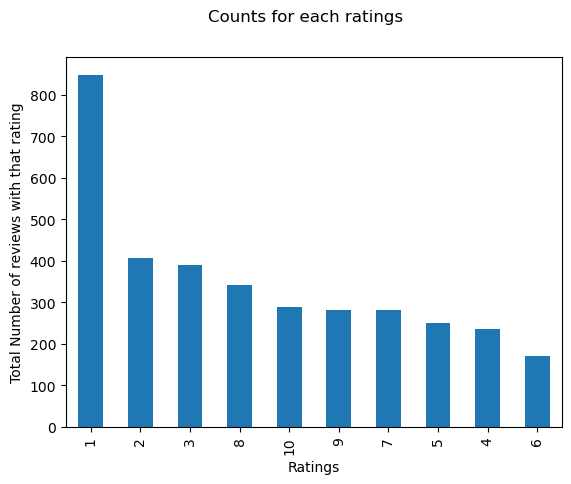

In [56]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [57]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [58]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [59]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [60]:
df_ratings

,Stars,total_counts,pct_values
0,1,848,24.25
1,2,406,11.61
2,3,390,11.15
3,8,341,9.75
4,10,290,8.29
5,9,283,8.09
6,7,282,8.06
7,5,251,7.18
8,4,235,6.72
9,6,171,4.89


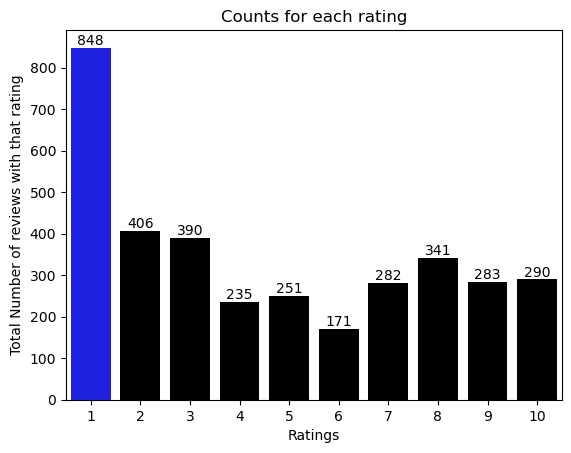

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find the maximum total_counts
max_total_counts = max(df_ratings['total_counts'])

# Set color to blue for the maximum total_counts, otherwise black
clrs = ['blue' if x == max_total_counts else 'black' for x in df_ratings['total_counts']]

# Create a bar plot
ax = sns.barplot(x='Stars', y='total_counts', data=df_ratings, errwidth=0, palette=clrs)

# Add labels and title
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each rating")

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()


In [64]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

71 unique countries


# Which country most review comes from?  

In [65]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [66]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

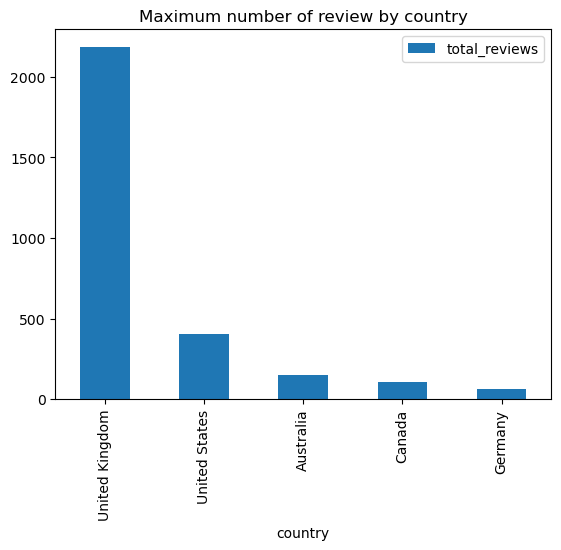

In [67]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

# Which country provided on average highest ratings?

In [69]:
df_country_rating = pd.DataFrame(df.groupby('country')['stars'].mean(numeric_only=True).sort_values(ascending=False)).reset_index()

In [70]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries ranking highest in average ratings given to British Airways')

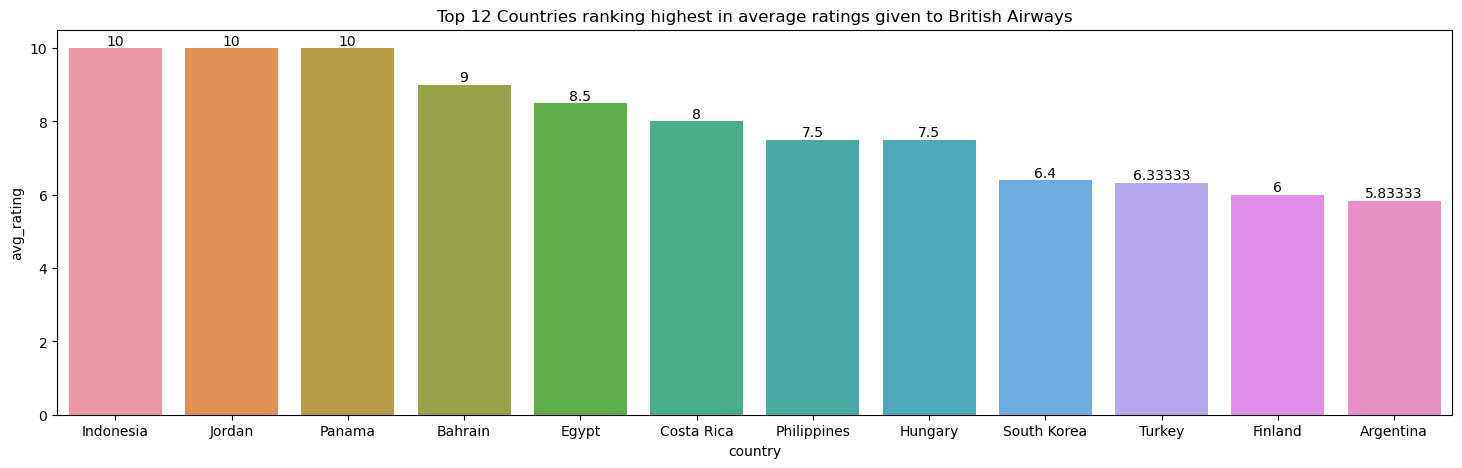

In [72]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries ranking highest in average ratings given to British Airways")

# Time Series Analysis

In [216]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [219]:
import plotly.express as px

fig = px.line(df, x='date', y="stars", line_shape='linear', markers=True,
              labels={'stars': 'Average Rating'}, title='Average Rating Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='Rating', xaxis_rangeslider_visible=True).show()

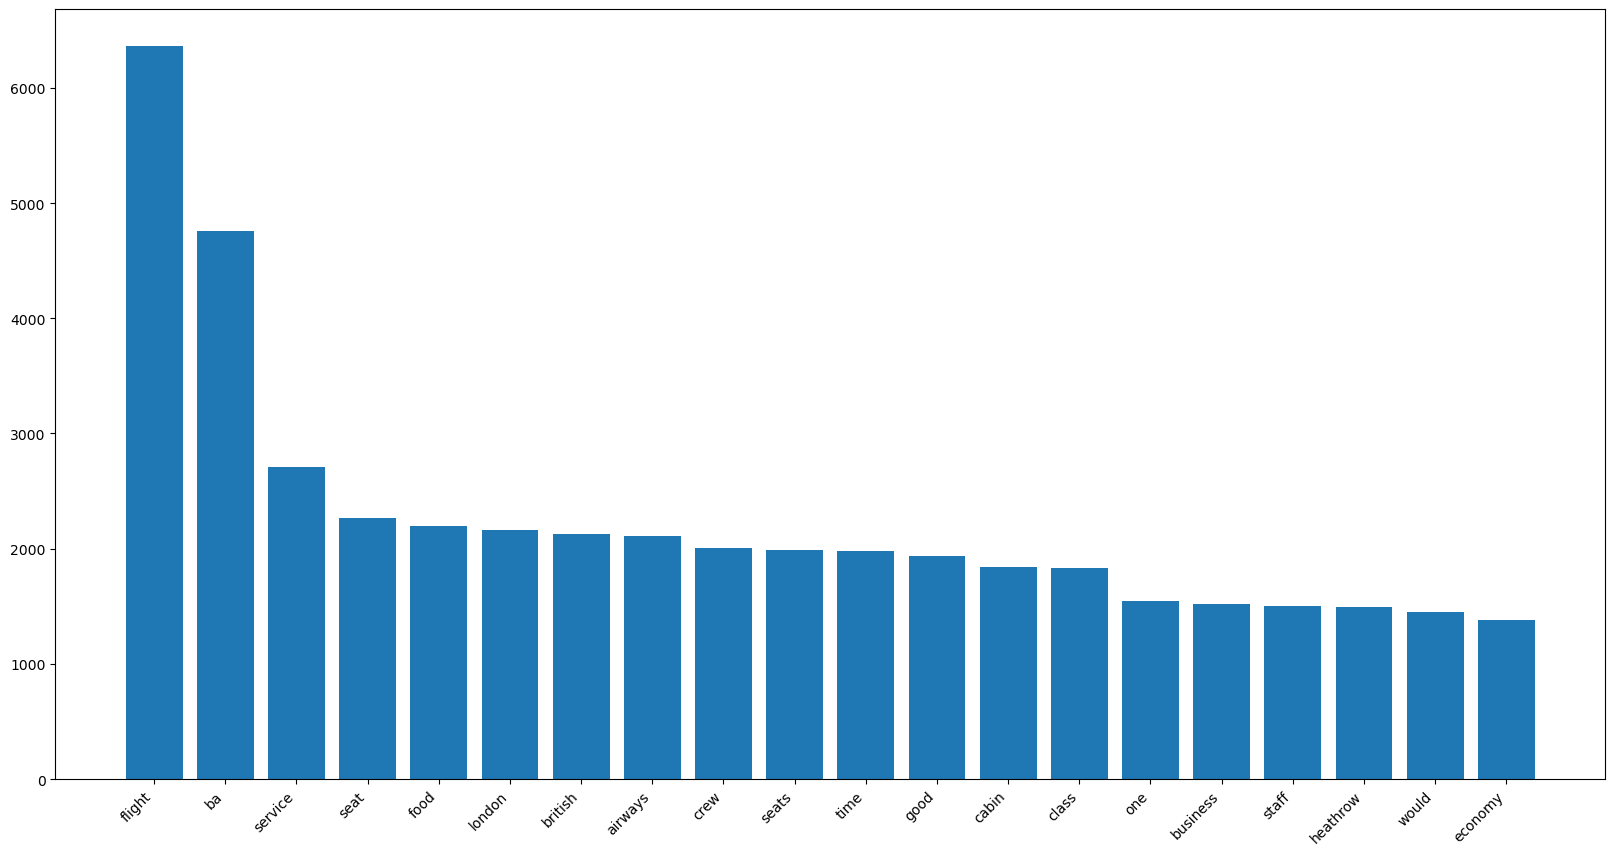

In [77]:
from collections import Counter
import matplotlib.pyplot as plt

# Start with one review:
reviews = " ".join(df.clean_reviews)

# Set up stopwords (you can customize this list)
stopwords_set = set(["the", "and", "to", "in", "of", "a", "for", "on", "with", "at", "by"])

# Count word frequencies
word_freq = Counter(word.lower() for word in reviews.split() if word.isalpha() and word.lower() not in stopwords_set)

# Create and display a basic bar chart of word frequencies
common_words = word_freq.most_common(20)
words, frequencies = zip(*common_words)

plt.figure(figsize=(20, 10))
plt.bar(words, frequencies)
plt.xticks(rotation=45, ha="right")
plt.show()


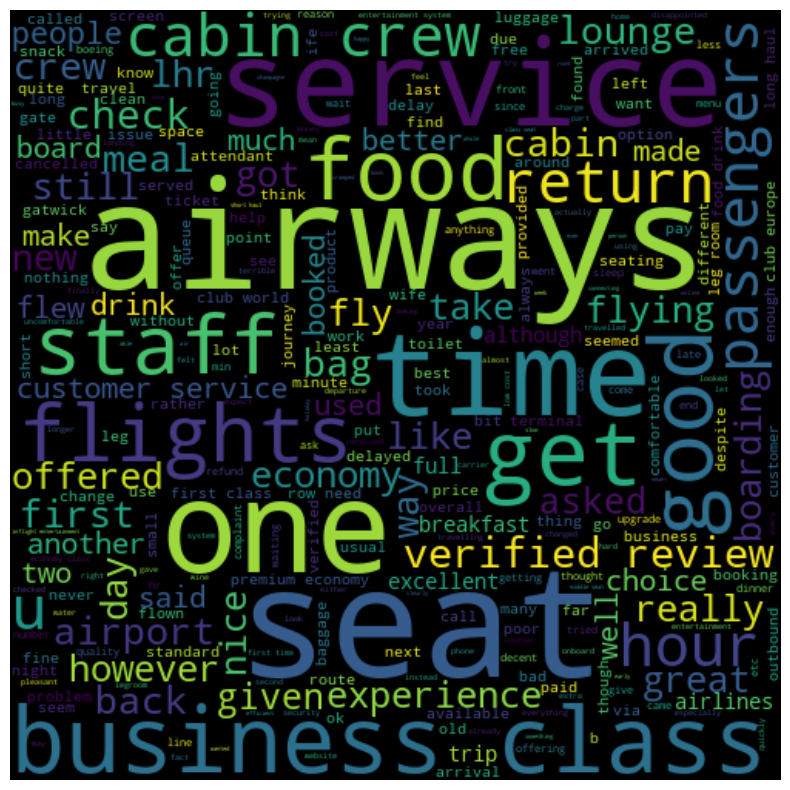

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Start with one review:
reviews = " ".join(df.clean_reviews)

# Set up stopwords
stopwords = set([
    "the", "and", "to", "in", "of", "a", "for", "on", "with", "at", "by",
    "ba", "flight", "british", "airway", "airline", "plane", "told", "also",
    "passenger", "london", "heathrow", "aircraft", "could", "even", "would"
])

# Create and generate a word cloud image:
wordcloud = WordCloud(height=500, width=500, max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Word Frequency

In [80]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import pandas as pd

# Split the text of all reviews into a list of words
words = reviews.split(" ")

# Remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', 'passenger', 'u', 'london', 'airway', 'british', 'airline',
                                           'heathrow', 'plane', 'lhr', 'review'])

# Filter out stopwords
new_words = [word for word in words if word.lower() not in stopwords]

# Count word frequencies
word_freq = Counter(new_words)

# Create a dataframe of these words and their frequencies
all_fdist = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
all_fdist = all_fdist.sort_values(by='Frequency', ascending=False).head(20)

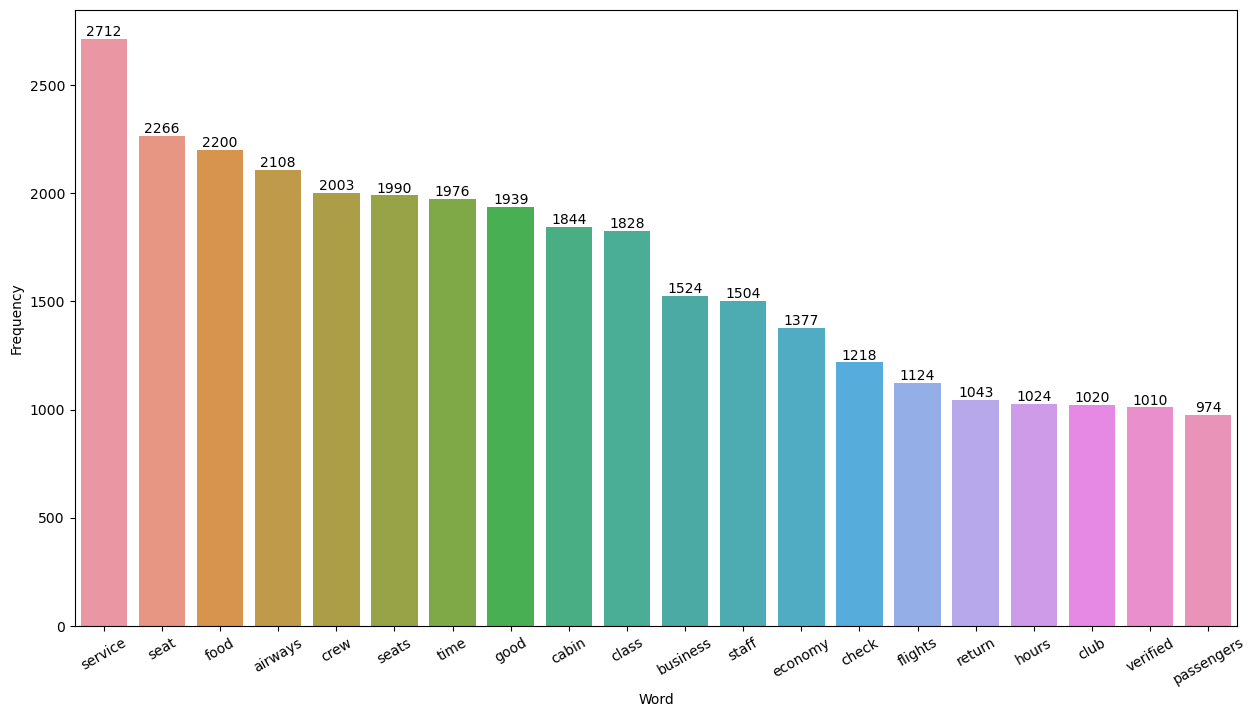

In [82]:
fig, ax = plt.subplots(figsize=(15, 8))

# Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist['Word'], y=all_fdist['Frequency'], ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)
plt.show()

This provides insight into the key topics customers are discussing. Notably, "service" emerges as the most frequently mentioned aspect, followed by "seat" and "food." These elements hold significant importance for customers in evaluating the airline's service. However, we lack details on the sentiment or specific expressions regarding each of these services. To gain a deeper understanding, we will utilize n-gram plots to analyze whether these mentions reflect positive or negative experiences.

# Word Frequency with N-gram

We will group the reviews based on ratings. Bad rating (1-3) are bad reviews, (4-6) are average/good experience and (7-10) shows a great experience. 

In [85]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

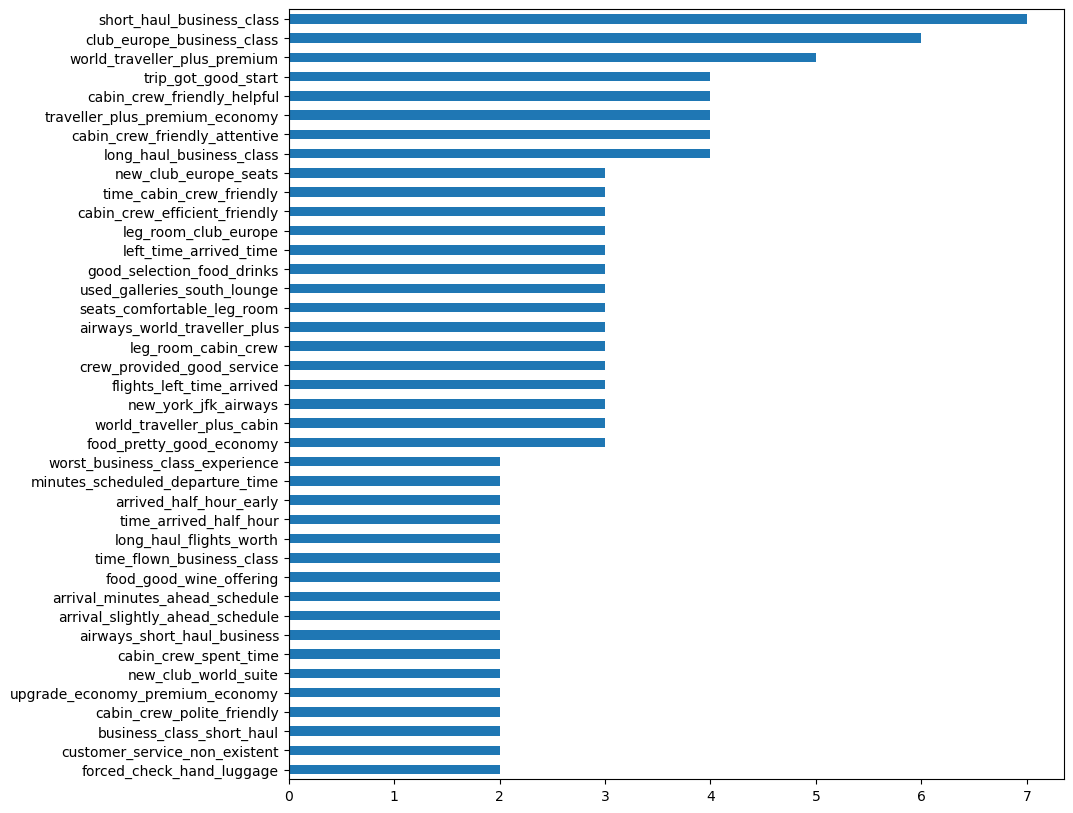

In [87]:
reviews_1_3 = " ".join(ratings_1_3.clean_reviews)
reviews_4_6 = " ".join(ratings_4_6.clean_reviews)
reviews_7_10 = " ".join(ratings_7_10.clean_reviews)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

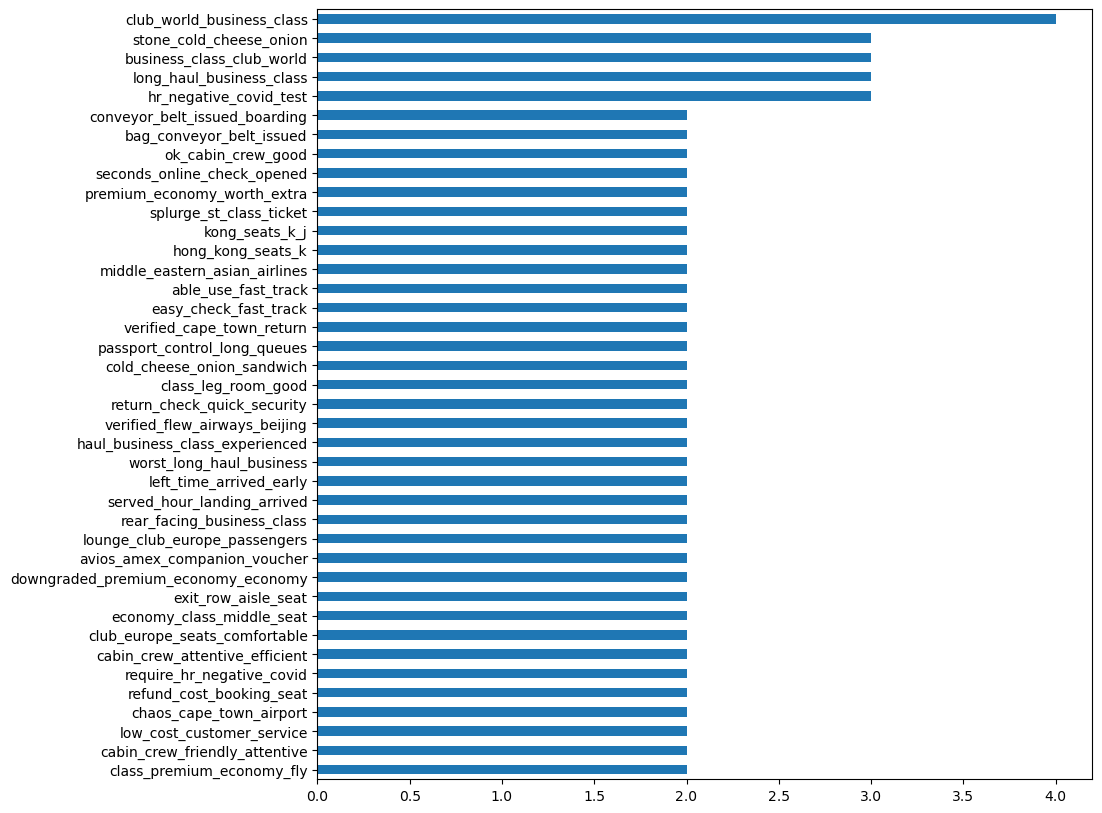

In [88]:

new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

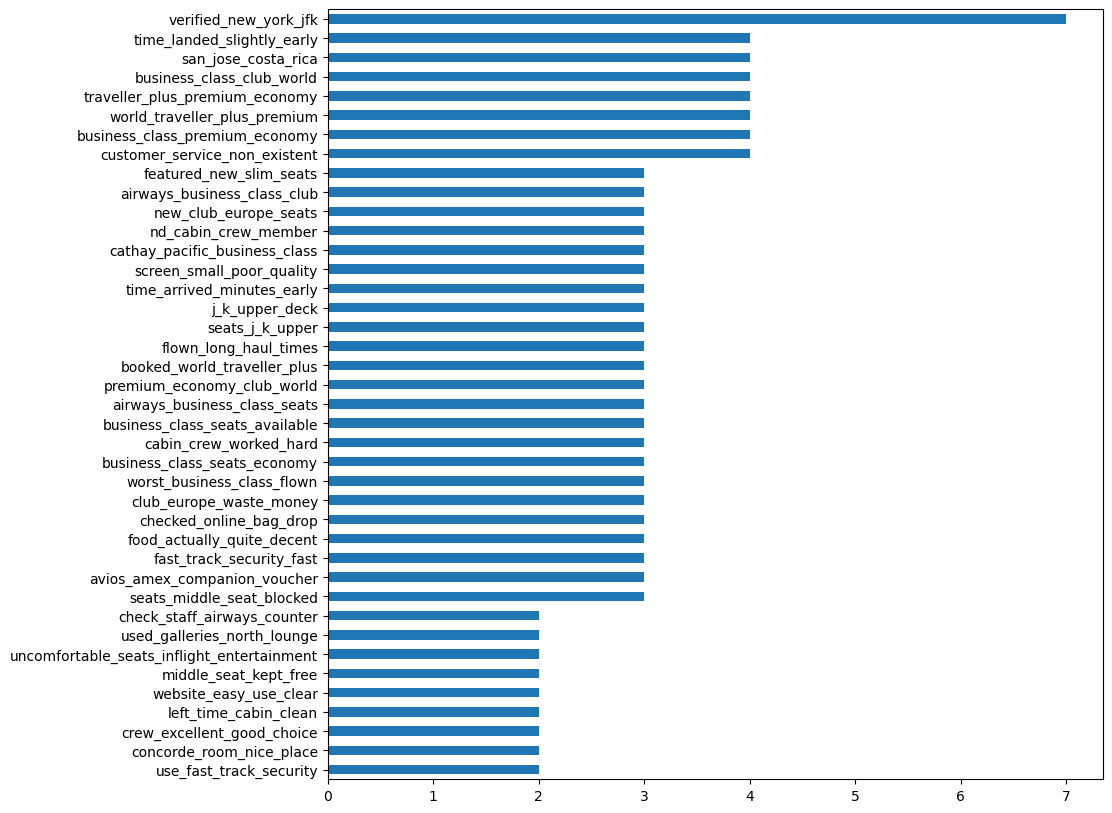

In [89]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

# Word Frequency with N-gram

In [102]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.clean_reviews)):
    sent= TextBlob(df.clean_reviews[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [103]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2362 number of reviews between -0.2 and 0.2 polarity score
1371 number of reviews between -0.1 and 0.1 polarity score


The polarity score ranges from -1 to 1, where values closer to -1 signify negative reviews, and vice versa for positive values. Applying a threshold of 0.2 categorizes reviews as positive if the polarity is greater and negative if less. This yields 2362 reviews in the neutral zone. To refine further, a threshold of 0.1 is considered.

# Topic Modeling with LDA
Looking at topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library. 

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit and transform the corpus using CountVectorizer
tf = CountVectorizer().fit_transform(df.clean_reviews).toarray()
tf_feature_names = CountVectorizer().fit(df.clean_reviews).get_feature_names_out()

In [114]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [115]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,1806.4,seat,864.9,flight,1914.9,ba,112.9,flight,977.8,economy,248.1,airways,809.9,ba,631.3
1,crew,1038.9,flight,629.3,ba,1059.2,one,70.3,ba,974.1,food,204.1,british,805.2,service,185.5
2,time,863.7,ba,588.6,us,630.2,staff,64.2,seats,795.9,ba,196.9,flight,738.7,staff,168.0
3,service,773.8,seats,497.4,told,598.6,lhr,55.3,good,777.2,class,196.1,ba,545.8,flight,156.4
4,cabin,773.7,crew,315.2,hours,544.5,food,49.6,seat,708.8,seat,164.4,london,521.4,club,156.1
5,good,766.3,cabin,314.4,would,518.1,seat,47.4,class,703.9,business,159.8,service,454.7,lounge,154.4
6,food,744.3,class,282.6,london,509.7,flights,45.4,service,576.8,seats,106.2,heathrow,334.3,food,141.7
7,ba,646.2,service,270.2,customer,490.3,get,39.6,club,559.8,flight,104.5,verified,326.6,class,126.2
8,london,514.0,business,269.9,get,460.0,flight,39.0,business,541.4,premium,102.4,review,302.8,business,115.4
9,meal,424.5,economy,264.3,british,456.0,passengers,38.1,food,519.5,poor,91.8,food,300.3,passengers,111.3


# Topic modeling with NMF

In [116]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.01965048, 0.09615713],
       [0.03838356, 0.15730488],
       [0.04706775, 0.04626496],
       ...,
       [0.02089837, 0.04927405],
       [0.03500759, 0.0007022 ],
       [0.06756466, 0.1086482 ]])

In [118]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [119]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,ba,17.8,flight,19.4
1,seat,11.1,ba,4.5
2,class,9.8,british,4.2
3,service,9.7,airways,4.2
4,food,9.3,us,3.8
5,seats,8.9,london,3.7
6,good,8.2,would,3.4
7,crew,8.0,hours,3.1
8,business,7.9,time,3.1
9,cabin,7.8,get,2.8


# Exploratory Data Analysis on Customer Bookings data for British Airways

We will explore the customer data first to get to know it better in depth.

In [126]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
#get current working directory

cwd = os.getcwd()

#read the csv

df = pd.read_csv(cwd + "/customer_booking.csv",  encoding="ISO-8859-1")

In [128]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [129]:
df.shape

(50000, 14)

In [130]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

# Sales Channel

In [132]:
per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100

In [133]:
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


# Trip Type

In [134]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100

In [135]:
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


# Purchase Lead

<Axes: xlabel='purchase_lead', ylabel='Count'>

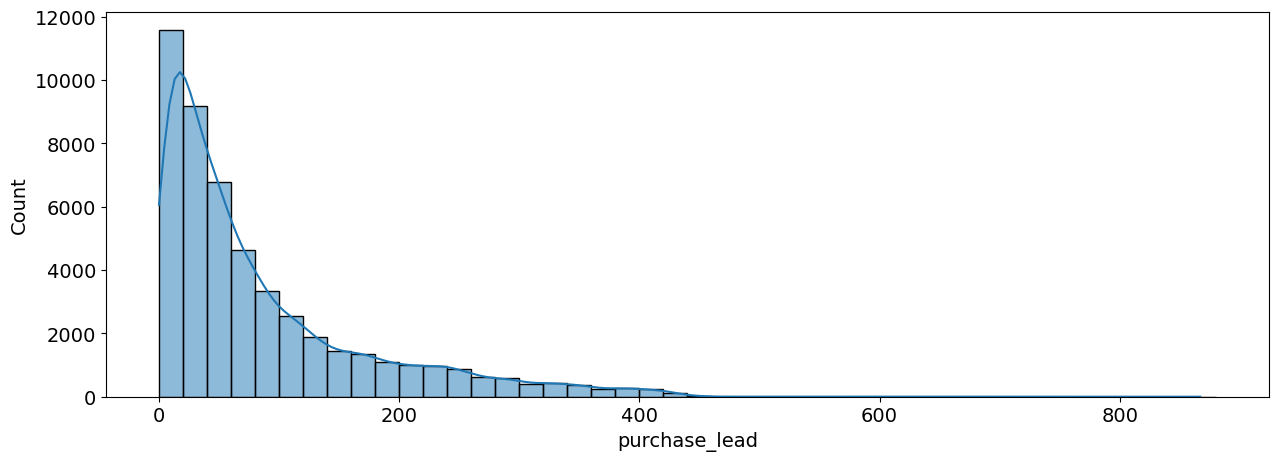

In [136]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

Some bookings were made over 2 years before the travel date, which appears unusual for typical advance bookings. This anomaly may be attributed to instances of cancellation and rebooking occurring twice within a 6-month period. Typically, airlines retain tickets for rebooking within a year. However, for the purpose of our analysis, we will treat these cases as outliers, as they could significantly impact the outcomes of predictive models.

In [137]:
(df.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

If we consider that customers do not book more than 1.5 years in advance, we will exclude all entries where the purchase_lead exceeds 600 days.

In [138]:
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,Fri,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,Thu,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,Fri,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,Mon,KIXMLE,Japan,0,0,1,7.00,1


In [139]:
#filtering the data to have only purchase lead days less than 600 days
df = df[df.purchase_lead <600 ]

# Length Of Stay

<Axes: xlabel='length_of_stay', ylabel='Count'>

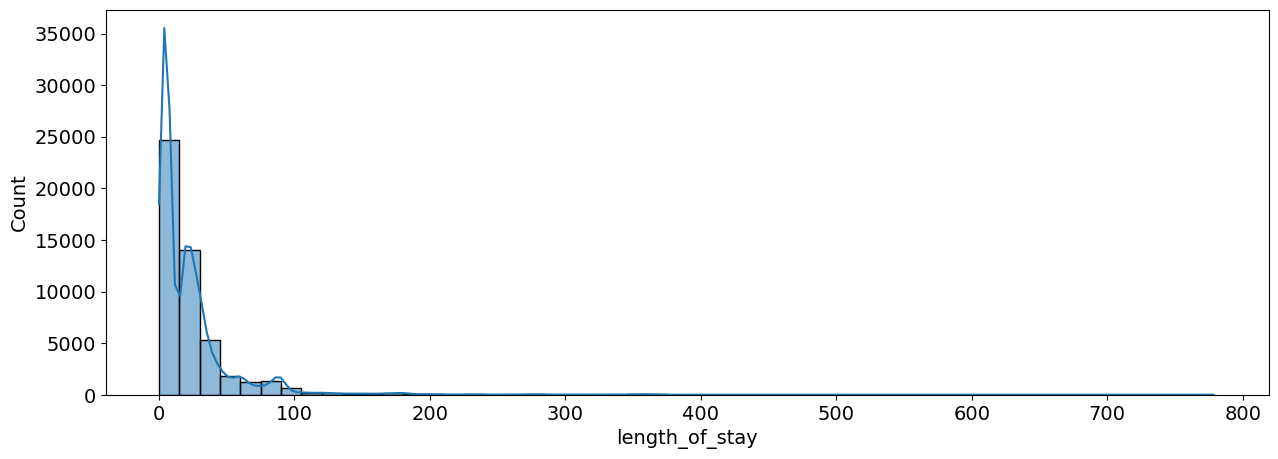

In [140]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True)

Let's see how many entries do we have that exceeds length of stay more than 100 days.

In [141]:
(df.length_of_stay> 200).value_counts()

False    49713
True       279
Name: length_of_stay, dtype: int64

In [142]:
df[df.length_of_stay> 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

Additional business knowledge is required to determine whether to exclude entries with stays exceeding 600 days. Various reasons may account for such extended bookings. However, our current emphasis is on analyzing bookings with a stay duration less than 500 days.

In [143]:
#filtering the data to have only length of stay days less than 500 days
df = df[df.purchase_lead <500 ]

# Flight Day

We will map the flight day with a number of a week. 

In [144]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

In [145]:
df.flight_day.value_counts()

1    8100
3    7671
2    7670
4    7423
5    6759
7    6550
6    5809
Name: flight_day, dtype: int64

Most of the customers want to travel on Monday and choose Wednesday as least preffered day as flight day.

# Booking Origin

Text(0, 0.5, 'Number of bookings')

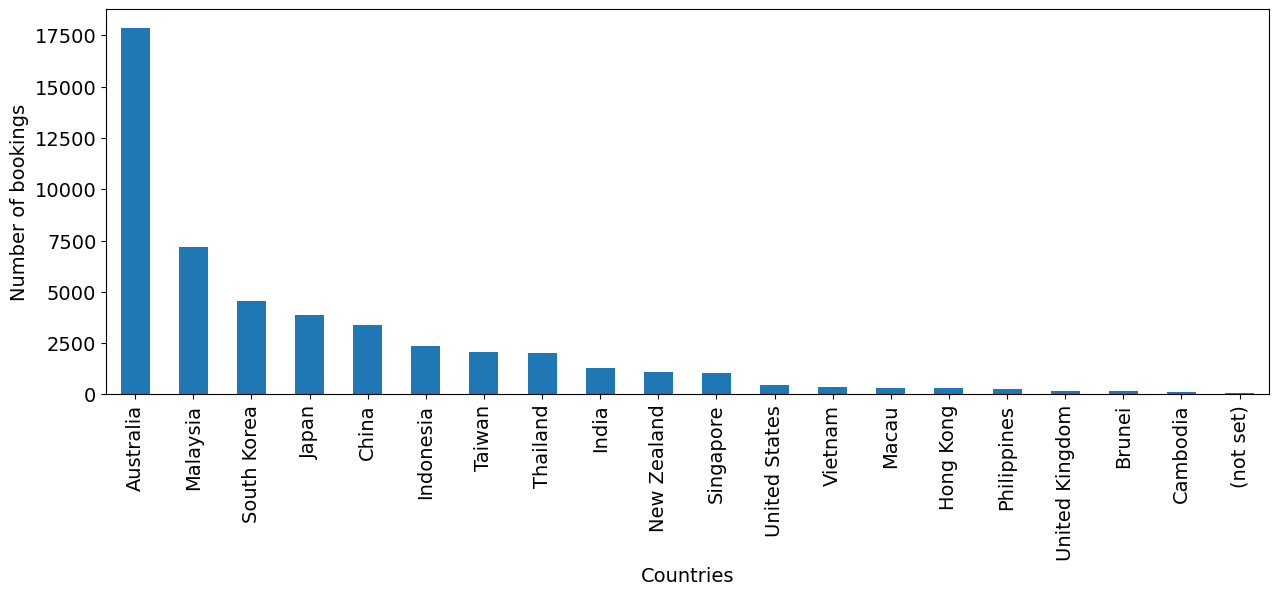

In [146]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Above chart shows travellers from which country had maximum booking applications. 

Text(0, 0.5, 'Number of complete bookings')

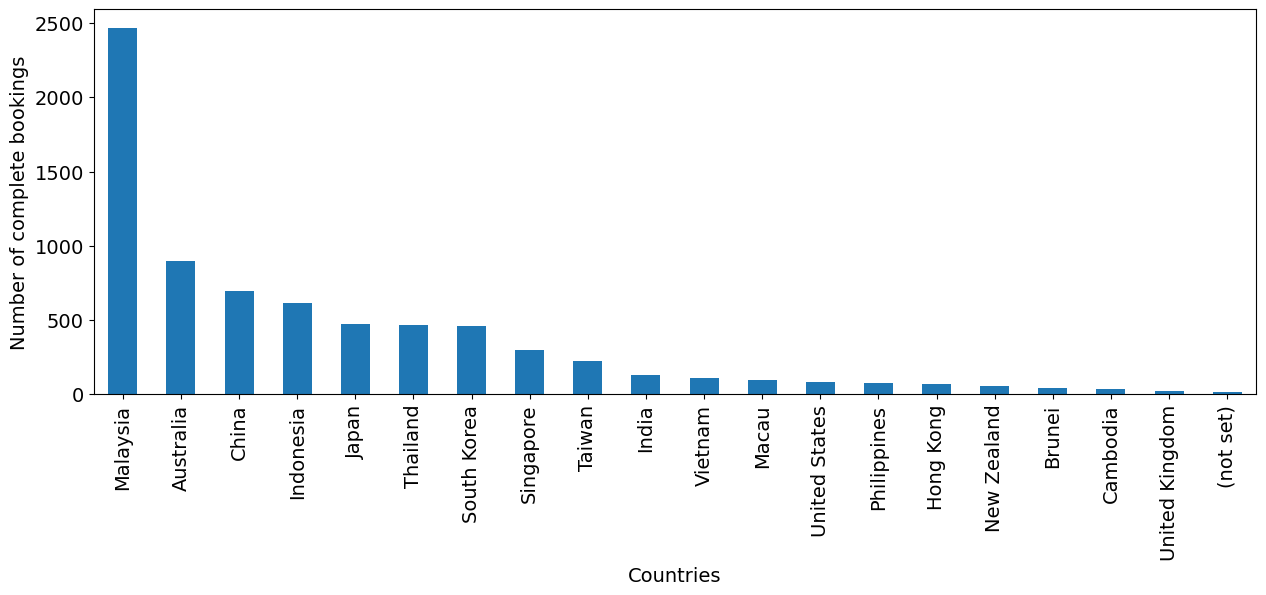

In [147]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

Above chart shows travellers from which country had their booking complete. 

# Booking complete

In [148]:
successful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100

In [149]:
unsuccessful_booking_per = 100-successful_booking_per

In [150]:
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


In [151]:
df.to_csv(cwd + "/filtered_customer_booking.csv")

# Predictive Model

In [222]:
# imports

import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

In [223]:
# get current working directory
cwd = os.getcwd()

df = pd.read_csv(cwd + "/filtered_customer_booking.csv", index_col=0)

In [224]:
df = df.reset_index(drop=True)

In [225]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [226]:
df_final = df

In [227]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)



In [228]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [229]:
#store the label for supervised learning
label = df['booking_complete']

In [230]:
df_final = df_final.drop('booking_complete', axis=1)

In [231]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


# Normalizaing the values

In [232]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [233]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [234]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [235]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


# Correlation matrix


<Axes: >

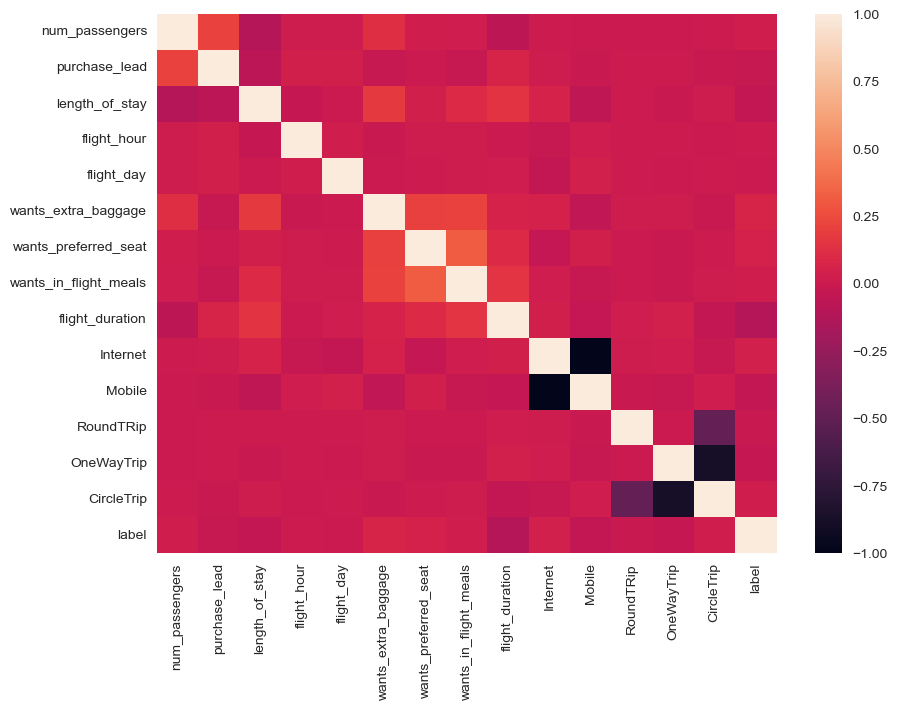

In [236]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

Now let's split the dataset into train and test sets.

## Splitting Train and Test Data

In [237]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [238]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [239]:

"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

# Random Forest Classifier

In [240]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)


# Checking Training accuracy

In [241]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


0.9341002876078529

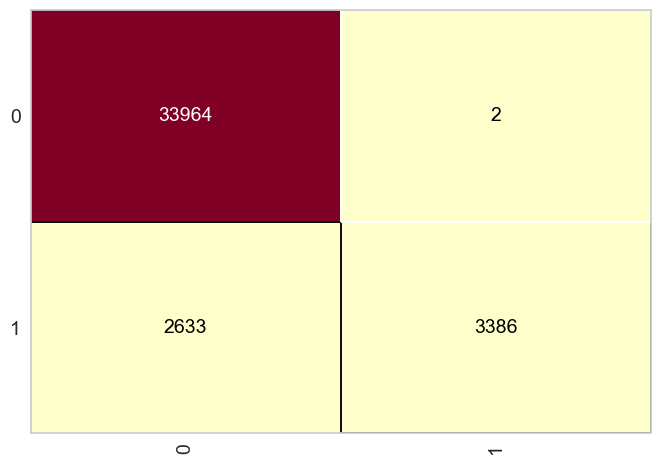

In [242]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

# Checking Testing accuracy

In [243]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.86, 0.56 and 0.07 respectively


0.8554566369910973

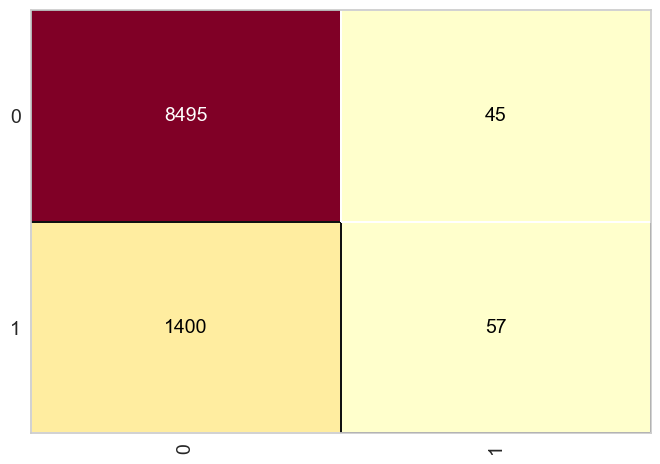

In [244]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

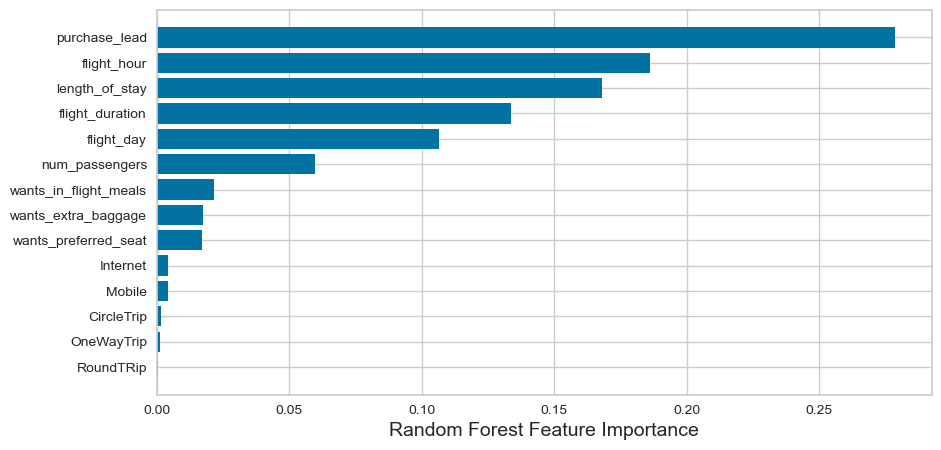

In [245]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Imbalanced datasets often contribute to a lower F1 score. In our case, there is a significant imbalance, with more entries classified as 0 than 1. To address this, we may consider reducing the number of entries classified as 0 to achieve a more balanced distribution, ideally aligning it with the number of entries classified as 1.

# Balancing the dataset

In [246]:
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [247]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [248]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [249]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [250]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,1.380962,0.947988,-0.119401,1.465988,-1.412280,0.703587,-0.650054,1.158002,-0.439155,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
1,-0.579424,-0.809083,-0.561979,0.172685,-0.408618,-1.421288,-0.650054,-0.863557,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
2,-0.579424,0.291867,0.677241,0.542200,-0.910449,0.703587,-0.650054,-0.863557,0.195526,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
3,2.361155,-0.475462,-0.089895,0.357443,0.093214,0.703587,1.538334,1.158002,-0.632900,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
4,-0.579424,-0.464341,-0.532474,-0.935861,-1.412280,0.703587,-0.650054,-0.863557,-0.439155,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,0.400769,-0.797962,0.529715,0.911715,-0.408618,-1.421288,-0.650054,-0.863557,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15472,-0.579424,-0.664514,-0.561979,-1.490134,1.598707,-1.421288,-0.650054,-0.863557,-0.439155,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15473,-0.579424,0.647729,0.028126,0.357443,-1.412280,0.703587,-0.650054,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15474,-0.579424,-0.820204,-0.561979,2.205019,1.598707,0.703587,1.538334,1.158002,0.930420,-2.810681,2.810681,-0.048231,-0.088336,0.100826,1


In [251]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [252]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [253]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.62, 0.6, 0.61, 0.64 and 0.6 respectively


0.6227390180878553

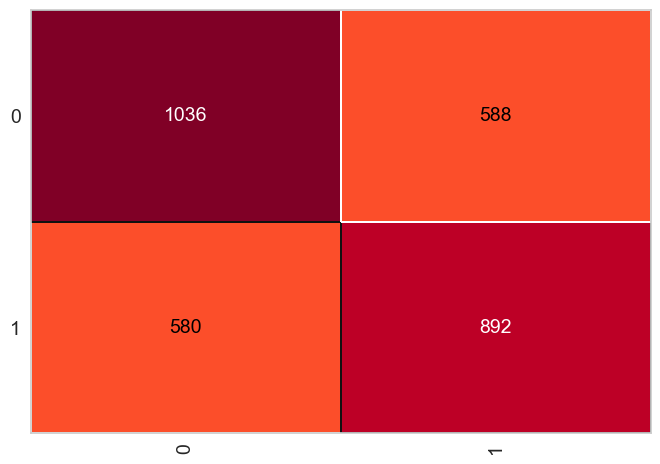

In [254]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

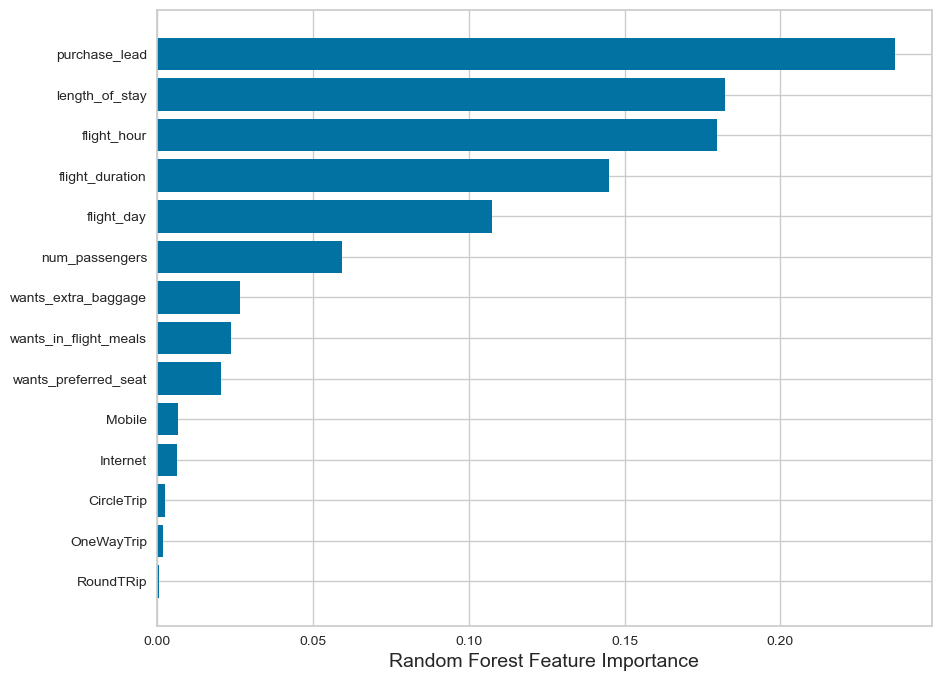

In [255]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")